In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style

%matplotlib inline

# Training models

* A	good	understanding	of	how	things	work	can	help	you	quickly	home	in on	the	appropriate	model,	the	right	training	algorithm	to	use,	and	a	good	set	of hyperparameters	for	your	task.
* 	Understanding	what’s	under	the	hood	will	also	help	you debug	issues	and	perform	error	analysis	more	efficiently.
* we	will	start	by	looking	at	the	$ Linear Regression model$,	one	of	the simplest	models	there	is.

# Linear	Regression

* Two	very	different	ways	to	train	 the Linear regression model :
* Using	a	direct	“closed-form”	equation	that	directly	computes	the	model	parameters that	best	fit	the	model	to	the	training	set.
* Using	an	iterative	optimization	approach,	called	Gradient	Descent	(GD),	that gradually	tweaks	the	model	parameters	to	minimize	the	cost	function	over	the training	set,	eventually	converging	to	the	same	set	of	parameters	as	the	first	method.

* Generally,	a	linear	model	makes	a	prediction	by	simply	computing	a	weighted	sum of	the	input	features,	plus	a	constant	called	the	bias	term	(also	called	the	intercept	term).
* $$ \hat{y} = θ_{0}+θ_{1}x_{1}+θ_{2}x_{2}......θ_{n}x_{n}$$
* where ŷ	is	the	predicted	value,
 n	is	the	number	of	features,
 $ x_{i}$  	is	the	i th 	feature	value,
 $θ_{j} $ 	is	the	j th 	model	parameter.

* Training	a	model	means	setting	its	parameters	so	that	the	model	best	fits	the	training	set.
* we	first	need	a	measure	of	how	well	(or	poorly)	the	model	fits	the training	data.
* The	most	common	performance	measure	of	a regression	model	is	the	Root	Mean	Square	Error (RMSE).
* Therefore,	to train	a	Linear	Regression	model,	you	need	to	find	the	value	of	θ	that	minimizes	the RMSE.	In	practice,	it	is	simpler	to	minimize	the	Mean	Square	Error	(MSE)	than	the RMSE,	and	it	leads	to	the	same	result.

* $$ MSE(X,h_{θ}) =\frac{1}{m}\sum_{i=1}^{m} (θ^T x^i -y^i)^2 $$

# Using  Normal	Equation

* To	find	the	value	of	θ	that	minimizes	the	cost	function,	there	is	a	closed-form	solution  in	other	words,	a	mathematical	equation	that	gives	the	result	directly.	This	is	called	the $"Normal	Equation"$.
* $$ \hat{θ} =(x^T x)^-1 x^T y$$
* where  $ \hat{θ}$  is	the	value	of	θ 	that	minimizes	the	cost	function,  y	is	the	vector	of	target	values	containing	$ y^1$	to	$y^m$ .

In [17]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

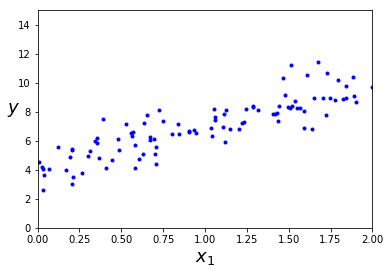

In [18]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

* Now	let’s	compute	 	using	the	Normal	Equation.	We	will	use	the	 inv() 	function	from NumPy’s	Linear	Algebra	module	( np.linalg )	to	compute	the	inverse	of	a	matrix,	and	the dot() 	method	for	matrix	multiplication.


In [24]:
X_b = np.c_[np.ones((100, 1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

* The	actual	function	that	we	used	to	generate	the	data	is	y	=	4	+	3$x_{0}$ 	+	Gaussian	noise.

In [25]:
theta_best

array([[ 4.12735393],
       [ 2.91545021]])

* We	would	have	hoped for	$	θ_{0}$ 	=	4	and	$ θ_{1}$ 	=	3	instead	of	$	θ_{0}$ 	=	4.127	and	$ θ_{1}$ 	=	2.915.	Close enough,	but	the	noise	made	it	impossible	to	recover	the	exact	parameters	of	the	original function.
* Now we can make predictions using $  \hat{θ} $.

In [26]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.12735393],
       [ 9.95825434]])

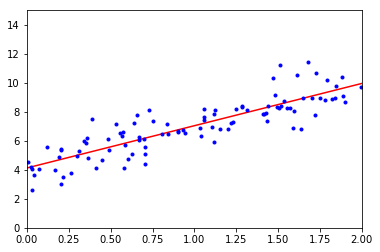

In [27]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Using scikit learn

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.12735393]), array([[ 2.91545021]]))

In [29]:
lin_reg.predict(X_new)

array([[ 4.12735393],
       [ 9.95825434]])

# Computational complexity

# Gradient Descent

* Gradient	Descent	is	a	very	generic	optimization	algorithm	capable	of	finding	optimal
 solutions	to	a	wide	range	of	problems.	
* The	general	idea	of	Gradient	Descent	is	to	tweak
 parameters	iteratively	in	order	to	minimize	a	cost	function.
* Gradient	Descent		measures	the	local	gradient	of	the	error	function	with	regards	to	the	parameter	vector	θ,
 and	it	goes	in	the	direction	of	descending	gradient.	Once	the	gradient	is	zero,	you	havereached	a	minimum!